In [1]:
import graphIO
import numpy as np
from Hemispheres import Hemispheres
from two_sample_t_test import two_sample_t_test

In [2]:
MAPPING_FILE = "data/region_name_mapping.json"
CALC_METHOD = 'lrc'
ASYM_METHOD = 'abs_diff'
SIGNIFICANCE_LEVEL = 0.05

In [3]:
regions = Hemispheres(MAPPING_FILE)
print(regions.size())

80


In [4]:
CN_dataset = graphIO.read_sp_adj_matrices_from_directory(
    f"data/curvatures/CN-50/{CALC_METHOD}")
AD_dataset = graphIO.read_sp_adj_matrices_from_directory(
    f"data/curvatures/AD-50/{CALC_METHOD}")
print(len(CN_dataset), len(AD_dataset))

50 50


In [5]:
CN_matrices = np.array(list(CN_dataset.values()))
AD_matrices = np.array(list(AD_dataset.values()))

In [6]:
CN_diff = []
AD_diff = []
if ASYM_METHOD == 'abs_diff':
    for i in range(len(CN_matrices)):
        cn_diff = []
        ad_diff = []
        for region in regions.region_names():
            cn_diff.append(abs(CN_matrices[i][regions.lh_region_index(region)].mean() - CN_matrices[i][regions.rh_region_index(region)].mean()))
            ad_diff.append(abs(AD_matrices[i][regions.lh_region_index(region)].mean() - AD_matrices[i][regions.rh_region_index(region)].mean()))
        CN_diff.append(cn_diff)
        AD_diff.append(ad_diff)
CN_diff = np.array(CN_diff)
AD_diff = np.array(AD_diff)
print(CN_diff.shape)
print(AD_diff.shape)

(50, 80)
(50, 80)


In [12]:
p_values = two_sample_t_test(CN_diff, AD_diff)
print(p_values)

The number of p-values below the significance level is: 80
[0.6193372  0.90500542 0.94608482 0.984755   0.44673078 0.62313524
 0.32531348 0.95369762 0.60506173 0.98539461 0.70548957 0.81735135
 0.19396556 0.45418846 0.85431493 0.74401269 0.10990407 0.71334399
 0.65501887 0.39727136 0.13691326 0.32707896 0.4694771  0.16676064
 0.17704902 0.25616545 0.25128178 0.24690558 0.17597146 0.45133407
 0.31343743 0.85378667 0.01486315 0.70608492 0.55842367 0.78757615
 0.01508303 0.08885417 0.74653426 0.22023527 0.42440499 0.2629243
 0.52306931 0.92008818 0.50532671 0.5822436  0.92125303 0.10834978
 0.25064346 0.07186021 0.76325749 0.59060522 0.46760787 0.73908199
 0.3674284  0.72173908 0.2368638  0.97713082 0.0086338  0.04839358
 0.25222978 0.10780801 0.85601989 0.26079755 0.74507117 0.66899283
 0.6830174  0.41561133 0.48179487 0.57635069 0.92682251 0.03336081
 0.59042605 0.00363336 0.74135407 0.96524739 0.29499851 0.71753384
 0.54712441 0.50158329]


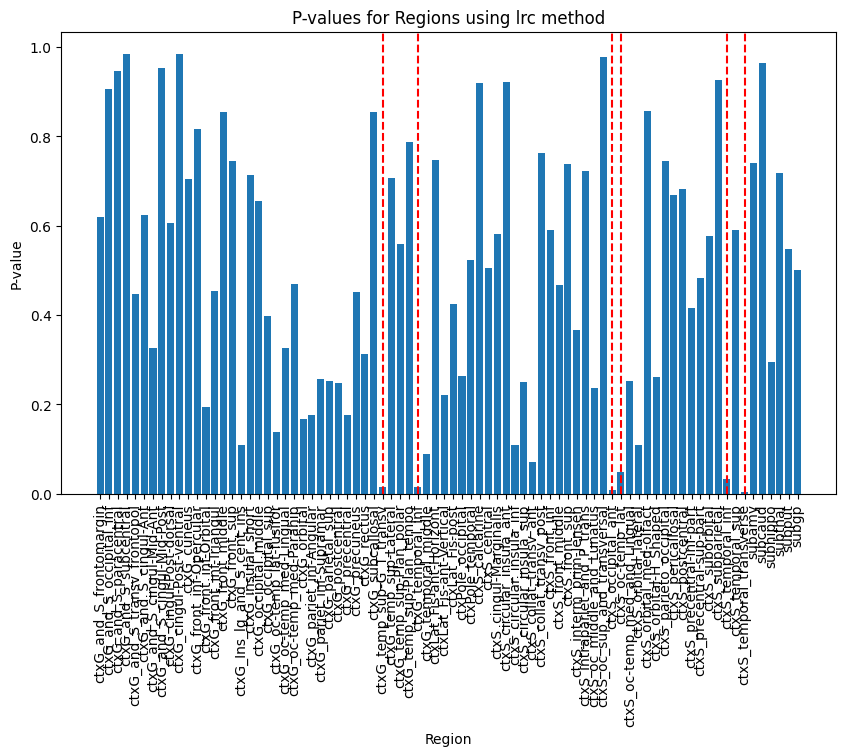

In [13]:
import matplotlib.pyplot as plt

# Get the region names
region_names = regions.region_names()

# Create a list to store the highlighted regions
highlighted_regions = []

# Iterate over the region names and p_values
for region, p_value in zip(region_names, p_values):
    if p_value < SIGNIFICANCE_LEVEL:
        highlighted_regions.append(region)

# Plot the p_values
plt.figure(figsize=(10, 6))
plt.bar(region_names, p_values)

# Highlight the significant regions
for region in highlighted_regions:
    plt.axvline(x=region, color='red', linestyle='--')

# Set the plot title and labels
plt.title(f'P-values for Regions using {CALC_METHOD} method')
plt.xlabel('Region')
plt.ylabel('P-value')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()
